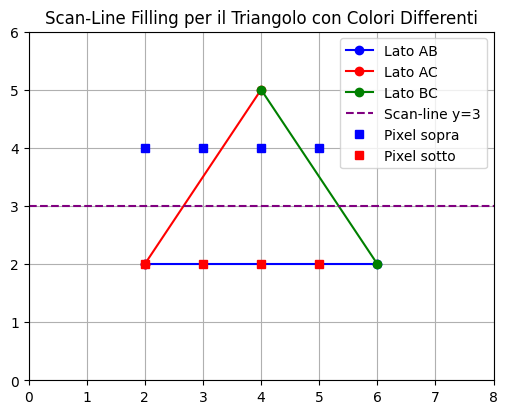

Intersezioni trovate: [2.6666666666666665, 5.333333333333333]
Pixel colorati sopra tra x=2 e x=5.
Pixel colorati sotto tra x=2 e x=5.


In [1]:
import matplotlib.pyplot as plt

# Funzione per calcolare le intersezioni di una scan-line con un lato del poligono
def find_intersection(x1, y1, x2, y2, scan_y):
    # Controlla se la scan-line interseca il lato
    if y1 == y2 or scan_y < min(y1, y2) or scan_y > max(y1, y2):
        return None  # Nessuna intersezione
    
    # Formula dell'intersezione
    x_intersect = x1 + (scan_y - y1) * (x2 - x1) / (y2 - y1)
    return x_intersect

# Definizione del triangolo
A = (2, 2)
B = (6, 2)
C = (4, 5)

# Scan-line
scan_y = 3

# Trova le intersezioni con i lati del triangolo
intersections = []

# Lato AB
intersection_AB = find_intersection(A[0], A[1], B[0], B[1], scan_y)
if intersection_AB is not None:
    intersections.append(intersection_AB)

# Lato AC
intersection_AC = find_intersection(A[0], A[1], C[0], C[1], scan_y)
if intersection_AC is not None:
    intersections.append(intersection_AC)

# Lato BC
intersection_BC = find_intersection(B[0], B[1], C[0], C[1], scan_y)
if intersection_BC is not None:
    intersections.append(intersection_BC)

# Ordina le intersezioni per x crescente
intersections.sort()

# Visualizza il triangolo e la scan-line
plt.figure(figsize=(6, 6))
plt.plot([A[0], B[0]], [A[1], B[1]], 'bo-', label='Lato AB')  # Lato AB
plt.plot([A[0], C[0]], [A[1], C[1]], 'ro-', label='Lato AC')  # Lato AC
plt.plot([B[0], C[0]], [B[1], C[1]], 'go-', label='Lato BC')  # Lato BC

# Disegna la scan-line
plt.axhline(y=scan_y, color='purple', linestyle='--', label=f'Scan-line y={scan_y}')

# Colorazione dei pixel interni
if len(intersections) == 2:  # Deve avere esattamente due intersezioni
    x_start, x_end = int(intersections[0]), int(intersections[1])
    
    # Colorazione della parte superiore (blu)
    for x in range(x_start, x_end + 1):
        plt.plot(x, scan_y + 1, 'bs', label='Pixel sopra' if x == x_start else "")
    
    # Colorazione della parte inferiore (rossa)
    for x in range(x_start, x_end + 1):
        plt.plot(x, scan_y - 1, 'rs', label='Pixel sotto' if x == x_start else "")

# Aggiungi etichette e legenda
plt.legend()
plt.grid(True)
plt.axis([0, 8, 0, 6])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Scan-Line Filling per il Triangolo con Colori Differenti')
plt.show()

# Stampa le intersezioni e i pixel colorati
print(f"Intersezioni trovate: {intersections}")
if len(intersections) == 2:
    print(f"Pixel colorati sopra tra x={int(intersections[0])} e x={int(intersections[1])}.")
    print(f"Pixel colorati sotto tra x={int(intersections[0])} e x={int(intersections[1])}.")
